## Lending Club Case Study

### Business Understanding

#### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### When a person applies for a loan, there are two types of decisions that could be taken by the company:
#### Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
#### Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
#### Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
#### Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
#### Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements

### AIm: To identify how various factors affect the defaulting of a customer loan.

#### importing the necessary libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### code to ignore the warning messages

In [108]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the data from the data frame

In [109]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [110]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### The number of columns are too large and we might not need all of them for our analysis, so we can drop the ones we don't need.

#### we will only consider the columns we need for our analysis. Our target variable is loan_status.

#### First let us drop all the columns having only NULL values which are of no use to us

In [111]:
df=loan_data.dropna(axis=1,how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### We can now pick the columns needed for analysis

In [112]:
loan = loan_data.loc[:,['id','loan_amnt','member_id','term','int_rate','installment','home_ownership','annual_inc','verification_status',
                        'issue_d','loan_status','pymnt_plan','addr_state','delinq_2yrs','mths_since_last_delinq',
                        'total_rec_late_fee','application_type','total_pymnt','last_pymnt_amnt','delinq_amnt','tax_liens','grade','sub_grade']]

In [113]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   member_id               39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   home_ownership          39717 non-null  object 
 7   annual_inc              39717 non-null  float64
 8   verification_status     39717 non-null  object 
 9   issue_d                 39717 non-null  object 
 10  loan_status             39717 non-null  object 
 11  pymnt_plan              39717 non-null  object 
 12  addr_state              39717 non-null  object 
 13  delinq_2yrs             39717 non-null  int64  
 14  mths_since_last_delinq  14035 non-null

#### we can drop mnths_since_last_delinq as well since more than half of it's values are NULL

In [114]:
loan = loan.drop(columns=['mths_since_last_delinq'])

### Features
* **id**  -                    A unique assigned ID for the loan listing.  
* **loan_amnt** -              The listed amount of the loan applied for by the borrower. 
* **member_id** -              A unique LC assigned Id for the borrower member.  
* **term** -                   The number of payments on the loan. Values are in months and can be either 36 or 60.
* **int_rate** -               Interest Rate on the loan
* **installment** -            The monthly payment owed by the borrower
* **home_ownership** -         The home ownership status provided by the borrower during registration.
* **annual_inc** -             The self-reported annual income provided by the borrower during registration.
* **verification_status** -    Indicates if income was verified by LC, not verified 
* **issue_d** -                The month which the loan was funded
* **loan_status** -            Current status of the loan 
* **pymnt_plan** -             Indicates if a payment plan has been put in place for the loan 
* **addr_state** -             The state provided by the borrower in the loan application
* **delinq_2yrs** -            The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years  
* **total_rec_late_fee** -     Late fees received to date
* **application_type** -       Indicates whether the loan is an individual application or a joint application
* **total_pymnt** -            Payments received to date for total amount funded
* **last_pymnt_amnt** -         Last total payment amount received
* **delinq_amnt** -            The past-due amount owed for the accounts on which the borrower is now delinquent.  
* **tax_liens** -              Number of tax liens

In [115]:
loan.shape

(39717, 22)

In [116]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   member_id            39717 non-null  int64  
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  pymnt_plan           39717 non-null  object 
 12  addr_state           39717 non-null  object 
 13  delinq_2yrs          39717 non-null  int64  
 14  total_rec_late_fee   39717 non-null  float64
 15  application_type     39717 non-null 

#### tax_liens column has some NULL values, let us check it's distribution to see what can be done

In [117]:
loan.tax_liens.describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [118]:
loan.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

#### As we can see that all the values are 0, we can drop this column for our anlysis

In [119]:
loan = loan.drop(columns=['tax_liens'])

In [120]:
loan.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,...,pymnt_plan,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,delinq_amnt,grade,sub_grade
0,1077501,5000,1296599,36 months,10.65%,162.87,RENT,24000.0,Verified,Dec-11,...,n,AZ,0,0.00,INDIVIDUAL,5863.155187,171.62,0,B,B2
1,1077430,2500,1314167,60 months,15.27%,59.83,RENT,30000.0,Source Verified,Dec-11,...,n,GA,0,0.00,INDIVIDUAL,1008.710000,119.66,0,C,C4
2,1077175,2400,1313524,36 months,15.96%,84.33,RENT,12252.0,Not Verified,Dec-11,...,n,IL,0,0.00,INDIVIDUAL,3005.666844,649.91,0,C,C5
3,1076863,10000,1277178,36 months,13.49%,339.31,RENT,49200.0,Source Verified,Dec-11,...,n,CA,0,16.97,INDIVIDUAL,12231.890000,357.48,0,C,C1
4,1075358,3000,1311748,60 months,12.69%,67.79,RENT,80000.0,Source Verified,Dec-11,...,n,OR,0,0.00,INDIVIDUAL,3513.330000,67.79,0,B,B5


In [121]:
loan.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

#### Since all the rows are zero in delinq_amnt we can drop this column

In [122]:
loan = loan.drop(columns=['delinq_amnt'])

#### loan.term should be an int but it is in the form of an object, similarly loan.int_rate should be converted to float

In [123]:
loan.term = loan.term.apply(lambda x: int(x.strip('months')))
loan.term.dtype

dtype('int64')

In [124]:
loan.int_rate = loan.int_rate.apply(lambda x: float(x.strip('%')))
loan.int_rate.dtype

dtype('float64')

In [125]:
loan.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade
0,1077501,5000,1296599,36,10.65,162.87,RENT,24000.0,Verified,Dec-11,Fully Paid,n,AZ,0,0.00,INDIVIDUAL,5863.155187,171.62,B,B2
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,GA,0,0.00,INDIVIDUAL,1008.710000,119.66,C,C4
2,1077175,2400,1313524,36,15.96,84.33,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,IL,0,0.00,INDIVIDUAL,3005.666844,649.91,C,C5
3,1076863,10000,1277178,36,13.49,339.31,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,CA,0,16.97,INDIVIDUAL,12231.890000,357.48,C,C1
4,1075358,3000,1311748,60,12.69,67.79,RENT,80000.0,Source Verified,Dec-11,Current,n,OR,0,0.00,INDIVIDUAL,3513.330000,67.79,B,B5


#### issue_d should be split in month and year to make analysis easier, create a new column by extracting month from issue_d

In [126]:
# Importing datetime Module to extract month from date
from datetime import datetime

def get_month(x):
    dt = datetime. strptime(x,'%b-%y')
    return dt.month
    
loan['issue_d_month'] = loan.issue_d.apply(get_month)

In [127]:
loan['issue_d_month']

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d_month, Length: 39717, dtype: int64

In [128]:
loan.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

#### since all values are same in this column we can drop this column as well

In [129]:
loan = loan.drop(columns=['pymnt_plan'])

In [130]:
loan.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
0,1077501,5000,1296599,36,10.65,162.87,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,0,0.00,INDIVIDUAL,5863.155187,171.62,B,B2,12
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.00,INDIVIDUAL,1008.710000,119.66,C,C4,12
2,1077175,2400,1313524,36,15.96,84.33,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,0,0.00,INDIVIDUAL,3005.666844,649.91,C,C5,12
3,1076863,10000,1277178,36,13.49,339.31,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,0,16.97,INDIVIDUAL,12231.890000,357.48,C,C1,12
4,1075358,3000,1311748,60,12.69,67.79,RENT,80000.0,Source Verified,Dec-11,Current,OR,0,0.00,INDIVIDUAL,3513.330000,67.79,B,B5,12


#### Since our Primary Analysis is for Defaulting Customers we can filter the data set appropriately by removing Current loan status records as we can't infer anything from them.

In [131]:
loan1 = loan[loan.loan_status == 'Charged Off']
loan1.shape

(5627, 20)

#### Detecting outliers in Numeric data types

In [132]:
loan1.loan_amnt.describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

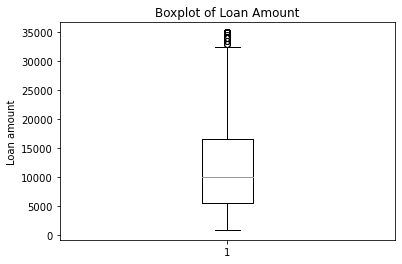

In [133]:
plt.boxplot(loan1['loan_amnt'])
plt.title("Boxplot of Loan Amount")
plt.ylabel("Loan amount")
plt.show()

In [134]:
loan1[loan1.loan_amnt > 33000]

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
430,1029473,33425,1258841,60,13.49,475.63,MORTGAGE,75000.0,Source Verified,Dec-11,Charged Off,NY,0,0.000000,INDIVIDUAL,19893.95,1370.08,C,C1,12
496,1063393,35000,1295948,60,20.30,619.88,OWN,85000.0,Verified,Dec-11,Charged Off,FL,0,0.000000,INDIVIDUAL,3093.50,619.88,E,E5,12
765,1053763,35000,1285365,60,20.89,576.27,MORTGAGE,71316.0,Verified,Dec-11,Charged Off,NC,1,0.000000,INDIVIDUAL,1151.20,576.27,F,F1,12
836,1059319,35000,1291122,60,19.03,593.77,MORTGAGE,235000.0,Verified,Dec-11,Charged Off,CA,0,0.000000,INDIVIDUAL,19075.97,31.28,E,E2,12
887,1058824,35000,1290419,60,20.89,944.71,RENT,90000.0,Source Verified,Dec-11,Charged Off,CA,0,94.480000,INDIVIDUAL,43184.67,944.71,F,F1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,683184,35000,872476,60,16.02,851.51,MORTGAGE,92000.0,Verified,Feb-11,Charged Off,NV,0,0.000000,INDIVIDUAL,13217.03,3000.00,D,D5,2
19142,679239,35000,867705,60,16.77,865.52,MORTGAGE,101000.0,Verified,Feb-11,Charged Off,MA,0,0.000000,INDIVIDUAL,28981.17,32.06,E,E2,2
19238,679046,35000,867473,60,16.40,858.59,OWN,76000.0,Verified,Feb-11,Charged Off,FL,0,0.000000,INDIVIDUAL,10297.35,200.33,E,E1,2
19430,674982,35000,862684,60,21.22,951.21,MORTGAGE,58000.0,Verified,Feb-11,Charged Off,NY,0,44.940951,INDIVIDUAL,14374.43,952.25,G,G4,2


In [135]:
loan1 = loan1[loan1.loan_amnt <= 33000]
loan1.shape

(5470, 20)

In [136]:
loan1.int_rate.describe()

count    5470.000000
mean       13.715982
std         3.603932
min         5.420000
25%        11.140000
50%        13.490000
75%        16.320000
max        24.400000
Name: int_rate, dtype: float64

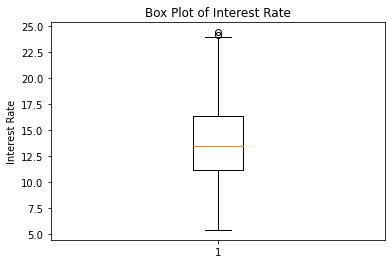

In [137]:
plt.boxplot(loan1['int_rate'])
plt.title("Box Plot of Interest Rate")
plt.ylabel("Interest Rate")
plt.show()

In [138]:
loan1[loan1.int_rate > 23]

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
601,1058624,12375,1290219,60,23.13,349.79,RENT,40000.00,Not Verified,Dec-11,Charged Off,FL,0,0.000000,INDIVIDUAL,8530.26,52.05,G,G2,12
2447,1036060,26300,1265925,60,23.13,743.38,MORTGAGE,65000.00,Source Verified,Dec-11,Charged Off,OH,0,0.000000,INDIVIDUAL,16354.36,743.38,G,G2,12
2749,896003,30000,1116554,60,23.52,854.71,RENT,110000.00,Verified,Dec-11,Charged Off,DC,0,42.686994,INDIVIDUAL,7625.93,876.00,G,G3,12
2801,1031468,14825,1261116,60,23.52,422.37,RENT,45600.00,Source Verified,Nov-11,Charged Off,FL,0,0.000000,INDIVIDUAL,2183.83,844.74,G,G3,11
3094,1025574,30000,1254736,60,23.13,847.96,RENT,102500.00,Verified,Nov-11,Charged Off,CA,0,0.000000,INDIVIDUAL,7810.50,100.00,G,G2,11
4214,1006364,23200,1232779,60,23.52,660.97,MORTGAGE,85000.00,Verified,Nov-11,Charged Off,TX,0,0.000000,INDIVIDUAL,31471.29,200.00,G,G3,11
4314,1004462,18400,1230902,60,23.13,520.08,MORTGAGE,75000.00,Verified,Nov-11,Charged Off,FL,1,0.000000,INDIVIDUAL,9707.88,40.12,G,G2,11
5820,977981,17625,1200792,60,23.91,506.12,MORTGAGE,400000.00,Verified,Oct-11,Charged Off,TX,0,0.000000,INDIVIDUAL,20896.16,506.12,G,G4,10
5964,976164,21250,1198310,60,24.11,612.68,RENT,80000.00,Verified,Oct-11,Charged Off,NY,0,30.480934,INDIVIDUAL,10258.65,150.78,G,G5,10
9854,842083,13650,1052700,60,23.59,389.45,RENT,40000.00,Not Verified,Aug-11,Charged Off,NJ,0,0.000000,INDIVIDUAL,15463.37,389.45,G,G5,8


In [139]:
loan1 = loan1[loan1.int_rate <= 23]

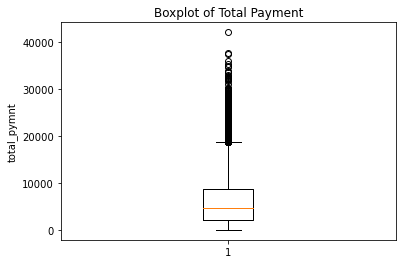

In [140]:
plt.boxplot(loan1.total_pymnt)
plt.title("Boxplot of Total Payment")
plt.ylabel("total_pymnt")
plt.show()

In [141]:
loan1[loan1.total_pymnt > 33000]

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
2030,1041534,33000,1271765,36,18.64,1203.66,MORTGAGE,115000.0,Source Verified,Dec-11,Charged Off,MD,1,0.000000,INDIVIDUAL,36040.93,1203.66,E,E1,12
5643,981929,30000,1205316,60,22.06,829.60,MORTGAGE,160000.0,Verified,Oct-11,Charged Off,CA,0,41.480000,INDIVIDUAL,37610.61,829.60,F,F4,10
5863,978431,25000,1201269,60,21.67,685.80,MORTGAGE,66000.0,Source Verified,Oct-11,Charged Off,IL,0,0.000000,INDIVIDUAL,33876.24,685.80,F,F3,10
7632,878770,32000,1093592,36,15.23,1112.90,MORTGAGE,60000.0,Verified,Sep-11,Charged Off,VA,0,0.000000,INDIVIDUAL,37523.12,36.54,C,C5,9
9694,812337,32350,1019488,60,21.74,888.70,MORTGAGE,91000.0,Verified,Aug-11,Charged Off,NJ,0,0.000000,INDIVIDUAL,42134.53,888.70,F,F5,8
15185,753084,32000,952719,60,18.39,819.40,RENT,182004.0,Source Verified,May-11,Charged Off,CA,0,0.000000,INDIVIDUAL,33594.12,819.40,E,E2,5
15636,743946,30000,942334,60,16.89,696.08,MORTGAGE,99996.0,Verified,May-11,Charged Off,PA,0,0.000000,INDIVIDUAL,35389.04,696.08,D,D4,5
17877,708969,30000,901520,60,17.51,753.83,MORTGAGE,100000.0,Verified,Mar-11,Charged Off,GA,0,0.000000,INDIVIDUAL,34855.27,38.57,E,E4,3
18848,685965,25975,875698,60,15.28,621.77,MORTGAGE,40000.0,Verified,Mar-11,Charged Off,TX,0,0.000000,INDIVIDUAL,33600.94,621.77,D,D3,3
26985,560150,25000,720996,60,13.61,576.67,MORTGAGE,124800.0,Verified,Aug-10,Charged Off,NY,0,28.796561,INDIVIDUAL,34765.35,865.02,C,C2,8


In [142]:
loan1 = loan1[loan1.total_pymnt <= 33000]

In [143]:
loan1.shape

(5448, 20)

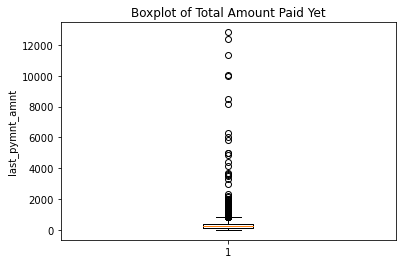

In [144]:
plt.boxplot(loan1.last_pymnt_amnt)
plt.title("Boxplot of Total Amount Paid Yet")
plt.ylabel("last_pymnt_amnt")
plt.show()

In [145]:
loan1[loan1.last_pymnt_amnt > 3000]

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
255,1066232,10000,1300594,36,12.42,334.16,RENT,39000.0,Source Verified,Dec-11,Charged Off,MO,0,0.000000,INDIVIDUAL,11604.88,4378.02,B,B4,12
570,1062478,28000,1294543,60,12.42,418.27,MORTGAGE,84996.0,Verified,Dec-11,Charged Off,GA,0,20.890628,INDIVIDUAL,14647.04,10000.00,B,B4,12
8311,865523,21500,1078839,36,16.89,765.36,RENT,65000.0,Verified,Sep-11,Charged Off,CA,0,74.685349,INDIVIDUAL,18691.79,4152.00,D,D4,9
9782,819977,25300,1028154,36,10.99,828.17,RENT,95000.0,Verified,Aug-11,Charged Off,NY,0,0.000000,INDIVIDUAL,25242.42,3711.12,B,B3,8
9963,840354,8450,1050722,60,11.49,185.80,RENT,42000.0,Source Verified,Aug-11,Charged Off,NC,0,0.000000,INDIVIDUAL,7608.77,6309.65,B,B4,8
10572,829797,21600,1038921,60,14.79,511.49,MORTGAGE,32160.0,Verified,Aug-11,Charged Off,NC,0,0.000000,INDIVIDUAL,18858.89,11328.71,C,C4,8
12737,788280,12225,991953,60,17.49,307.06,MORTGAGE,105000.0,Not Verified,Jun-11,Charged Off,FL,0,15.347575,INDIVIDUAL,6931.98,5000.00,D,D5,6
12951,789015,8000,992835,36,7.49,248.82,MORTGAGE,87000.0,Not Verified,Jun-11,Charged Off,CA,0,0.000000,INDIVIDUAL,5308.78,3584.00,A,A4,6
15480,726234,17000,921576,60,11.99,378.07,MORTGAGE,58000.0,Verified,May-11,Charged Off,CA,0,0.000000,INDIVIDUAL,9311.51,8184.05,B,B5,5
17823,708214,16000,900684,60,9.63,337.05,RENT,33924.0,Verified,Mar-11,Charged Off,PA,0,0.000000,INDIVIDUAL,15951.85,3618.05,B,B1,3


In [146]:
loan1 = loan1[loan1.last_pymnt_amnt <= 3000]

In [147]:
loan1.shape

(5428, 20)

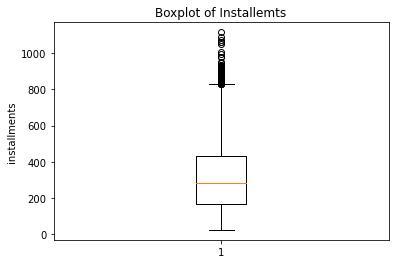

In [148]:
plt.boxplot(loan1.installment)
plt.title("Boxplot of Installemts")
plt.ylabel("installments")
plt.show()

In [149]:
loan1[loan1.installment > 900]

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
2373,1037026,28000,1266711,36,16.77,995.08,OWN,76000.0,Verified,Nov-11,Charged Off,OH,0,0.000000,INDIVIDUAL,32751.27,400.00,D,D2,11
3309,1020845,30750,1249631,36,18.25,1115.55,RENT,80000.0,Verified,Nov-11,Charged Off,CA,0,0.000000,INDIVIDUAL,8716.70,1115.55,D,D5,11
4033,994506,30000,1219134,36,7.51,933.33,OWN,125000.0,Verified,Nov-11,Charged Off,NY,0,0.000000,INDIVIDUAL,5574.67,933.33,A,A3,11
4389,1003549,30000,1230136,36,10.65,977.20,RENT,97000.0,Verified,Oct-11,Charged Off,MI,0,14.997547,INDIVIDUAL,14800.55,1957.08,B,B2,10
4549,1000967,30000,1226719,36,17.27,1073.62,MORTGAGE,75000.0,Verified,Oct-11,Charged Off,TX,0,0.000000,INDIVIDUAL,16102.20,1073.62,D,D3,10
6176,971860,30000,1193617,36,6.62,921.11,MORTGAGE,61500.0,Verified,Oct-11,Charged Off,FL,0,0.000000,INDIVIDUAL,19230.57,26.60,A,A2,10
6963,889797,30000,1106361,36,12.69,1006.35,RENT,84000.0,Verified,Sep-11,Charged Off,NY,0,0.000000,INDIVIDUAL,30240.82,133.49,B,B5,9
7080,886292,25500,1102106,36,17.27,912.58,MORTGAGE,75000.0,Source Verified,Oct-11,Charged Off,WA,0,0.000000,INDIVIDUAL,12884.24,912.58,D,D3,10
8551,864057,28000,1077267,36,12.99,943.30,MORTGAGE,160000.0,Source Verified,Sep-11,Charged Off,TX,0,0.000000,INDIVIDUAL,20751.38,943.30,C,C1,9
8699,862084,26400,1075011,36,16.49,934.55,MORTGAGE,68000.0,Verified,Aug-11,Charged Off,FL,0,0.000000,INDIVIDUAL,14612.11,64.98,D,D3,8


In [150]:
loan1 = loan1[loan1.installment <= 900]

In [151]:
loan1.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.0,INDIVIDUAL,1008.71,119.66,C,C4,12
8,1071795,5600,1306957,60,21.28,152.39,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,646.02,152.39,F,F2,12
9,1071570,5375,1306721,60,12.69,121.45,RENT,15000.0,Verified,Dec-11,Charged Off,TX,0,0.0,INDIVIDUAL,1476.19,121.45,B,B5,12
12,1064687,9000,1298717,36,13.49,305.38,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,0,0.0,INDIVIDUAL,2270.70,305.38,C,C1,12
14,1069057,10000,1303503,36,10.65,325.74,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,7471.99,325.74,B,B2,12


In [152]:
loan1.shape

(5400, 20)

### Univariate Analysis

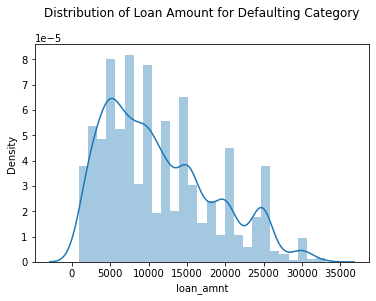

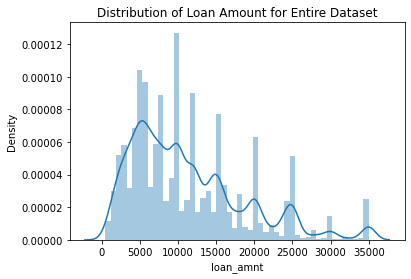

In [153]:
sns.distplot(loan1.loan_amnt)
plt.title("Distribution of Loan Amount for Defaulting Category", x=0.5, y=1.1)
plt.show()
sns.distplot(loan.loan_amnt)
plt.title("Distribution of Loan Amount for Entire Dataset")
plt.show()

#### From the above plots can conclude that loan is usually borrowed in 2.5k intervals by more number of people, spikes at 2.5k intervals say so.

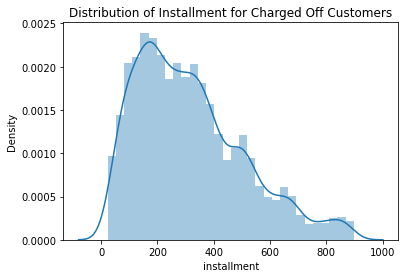

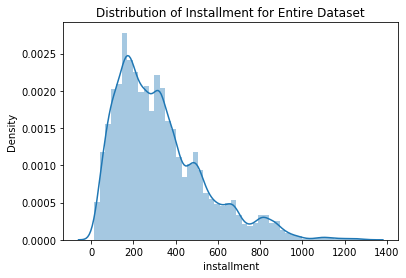

In [154]:
sns.distplot(loan1.installment)
plt.title("Distribution of Installment for Charged Off Customers")
plt.show()
sns.distplot(loan.installment)
plt.title("Distribution of Installment for Entire Dataset")
plt.show()

#### Maximum number of people pay for installments per month of 200.

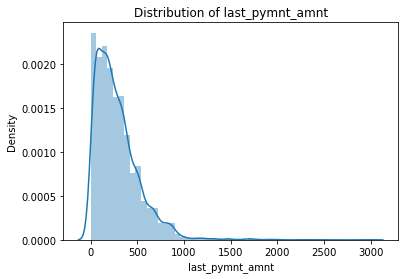

count    5400.000000
mean      285.338102
std       239.246394
min         0.000000
25%       110.832500
50%       229.875000
75%       391.460000
max      3000.000000
Name: last_pymnt_amnt, dtype: float64

In [155]:
sns.distplot(loan1.last_pymnt_amnt)
plt.title("Distribution of last_pymnt_amnt")
plt.show()
loan1.last_pymnt_amnt.describe()

#### This indicates that most people who been charged off have paid balance amount between 0 - 1k.

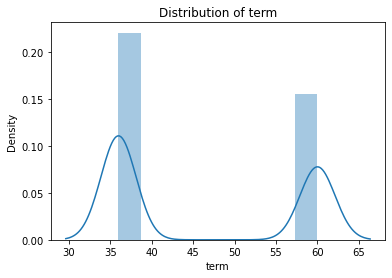

In [156]:
sns.distplot(loan1.term)
plt.title("Distribution of term")
plt.show()

#### This shows that people whose term is 36 months are more likely to default than those who have term as 60 months. The difference is nearly 1.5 times.

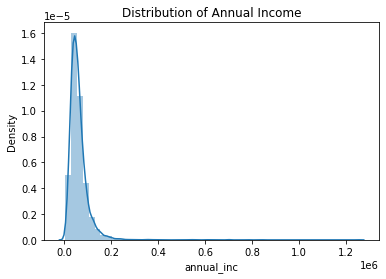

In [157]:
sns.distplot(loan1.annual_inc)
plt.title("Distribution of Annual Income")
plt.show()

#### People who have Annual Income Less than 2 Lakhs are more likely to Default on a Loan

In [158]:
loan1.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.0,INDIVIDUAL,1008.71,119.66,C,C4,12
8,1071795,5600,1306957,60,21.28,152.39,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,646.02,152.39,F,F2,12
9,1071570,5375,1306721,60,12.69,121.45,RENT,15000.0,Verified,Dec-11,Charged Off,TX,0,0.0,INDIVIDUAL,1476.19,121.45,B,B5,12
12,1064687,9000,1298717,36,13.49,305.38,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,0,0.0,INDIVIDUAL,2270.70,305.38,C,C1,12
14,1069057,10000,1303503,36,10.65,325.74,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,7471.99,325.74,B,B2,12


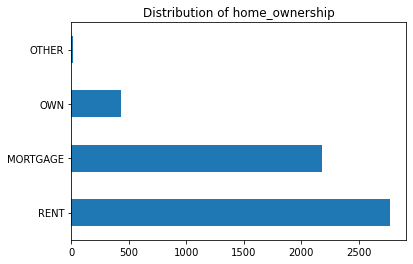

In [159]:
loan1.home_ownership.value_counts().plot.barh()
plt.title("Distribution of home_ownership")
plt.show()

#### People who are in mortgage agreement or in Rent are more likely to default than People who have Own Houses with Maximum number of defaults coming from people who live in rented homes.

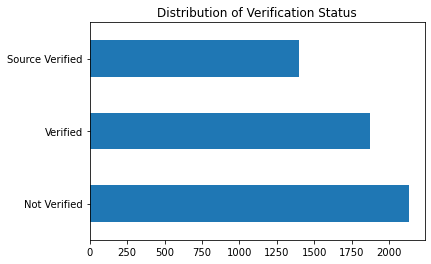

In [160]:
loan1.verification_status.value_counts().plot.barh()
plt.title("Distribution of Verification Status")
plt.show()

#### Not Verified People are more likely to default than verified and Verified ones are more likely to default than ones Whose Source of Income is verified

In [161]:
loan1.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.0,INDIVIDUAL,1008.71,119.66,C,C4,12
8,1071795,5600,1306957,60,21.28,152.39,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,646.02,152.39,F,F2,12
9,1071570,5375,1306721,60,12.69,121.45,RENT,15000.0,Verified,Dec-11,Charged Off,TX,0,0.0,INDIVIDUAL,1476.19,121.45,B,B5,12
12,1064687,9000,1298717,36,13.49,305.38,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,0,0.0,INDIVIDUAL,2270.70,305.38,C,C1,12
14,1069057,10000,1303503,36,10.65,325.74,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,7471.99,325.74,B,B2,12


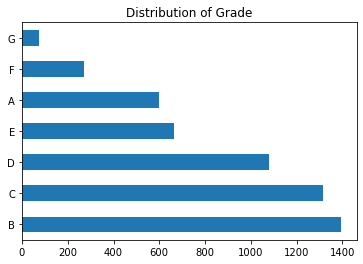

In [162]:
loan1.grade.value_counts().plot.barh()
plt.title("Distribution of Grade")
plt.show()

#### Grade assigned as B has the highest default rate than all the other grades

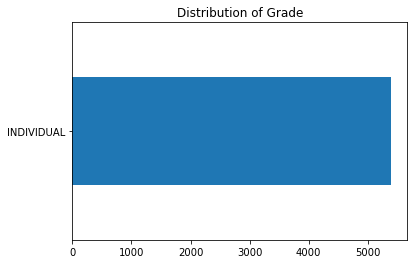

In [163]:
loan1.application_type.value_counts().plot.barh()
plt.title("Distribution of Grade")
plt.show()

#### All the loan defaulters are Individual Borrowers

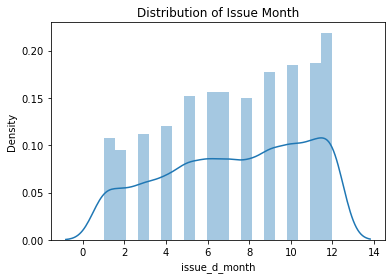

In [164]:
sns.distplot(loan1.issue_d_month)
plt.title("Distribution of Issue Month")
plt.show()

#### Maximum Loan Defaults have happened for loans issued in month of Dec

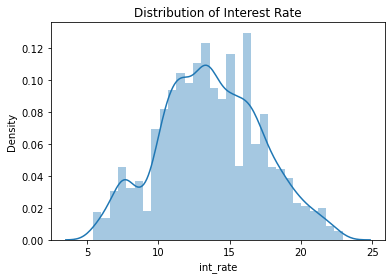

In [165]:
sns.distplot(loan1.int_rate)
plt.title("Distribution of Interest Rate")
plt.show()

In [166]:
loan1.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.0,INDIVIDUAL,1008.71,119.66,C,C4,12
8,1071795,5600,1306957,60,21.28,152.39,OWN,40000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,646.02,152.39,F,F2,12
9,1071570,5375,1306721,60,12.69,121.45,RENT,15000.0,Verified,Dec-11,Charged Off,TX,0,0.0,INDIVIDUAL,1476.19,121.45,B,B5,12
12,1064687,9000,1298717,36,13.49,305.38,RENT,30000.0,Source Verified,Dec-11,Charged Off,VA,0,0.0,INDIVIDUAL,2270.70,305.38,C,C1,12
14,1069057,10000,1303503,36,10.65,325.74,RENT,100000.0,Source Verified,Dec-11,Charged Off,CA,0,0.0,INDIVIDUAL,7471.99,325.74,B,B2,12


### Bivariate Analysis on categorical variables

#### Now considering both the Charged Off and Paid loans and Ignoring Current loan status as it gives us no value

In [167]:
loan2 = loan[~(loan.loan_status == 'Current')]
loan2.shape

(38577, 20)

In [168]:
loan2.head()

,id,loan_amnt,member_id,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,delinq_2yrs,total_rec_late_fee,application_type,total_pymnt,last_pymnt_amnt,grade,sub_grade,issue_d_month
0,1077501,5000,1296599,36,10.65,162.87,RENT,24000.0,Verified,Dec-11,Fully Paid,AZ,0,0.00,INDIVIDUAL,5863.155187,171.62,B,B2,12
1,1077430,2500,1314167,60,15.27,59.83,RENT,30000.0,Source Verified,Dec-11,Charged Off,GA,0,0.00,INDIVIDUAL,1008.710000,119.66,C,C4,12
2,1077175,2400,1313524,36,15.96,84.33,RENT,12252.0,Not Verified,Dec-11,Fully Paid,IL,0,0.00,INDIVIDUAL,3005.666844,649.91,C,C5,12
3,1076863,10000,1277178,36,13.49,339.31,RENT,49200.0,Source Verified,Dec-11,Fully Paid,CA,0,16.97,INDIVIDUAL,12231.890000,357.48,C,C1,12
5,1075269,5000,1311441,36,7.90,156.46,RENT,36000.0,Source Verified,Dec-11,Fully Paid,AZ,0,0.00,INDIVIDUAL,5632.210000,161.03,A,A4,12


#### Converting Fully Paid to 0 and Charged Off to 1 so that we can carry out analysis easily

In [169]:
loan2.loan_status = loan2.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)

In [170]:
pv = loan2.pivot_table(values = ['loan_status'], index = ['home_ownership'], columns = ['verification_status'], aggfunc=np.sum)

In [171]:
pv

loan_status                         
verification_status Not Verified Source Verified Verified
home_ownership                                           
MORTGAGE                   836.0           489.0   1002.0
NONE                         0.0             NaN      NaN
OTHER                       10.0             1.0      7.0
OWN                        187.0           117.0    139.0
RENT                      1109.0           827.0    903.0

#### Mortgage-Verified and Rent-Not Verified are the most defaulting categories, Though Mortage Verified is a Peculiar Category.

In [172]:
pv = loan2.pivot_table(values = ['loan_status'], index = ['home_ownership'], columns = ['grade'], aggfunc=np.sum)

In [173]:
pv

loan_status                                         
grade                    A      B      C      D      E      F     G
home_ownership                                                     
MORTGAGE             266.0  594.0  541.0  429.0  306.0  149.0  42.0
NONE                   0.0    0.0    NaN    NaN    NaN    NaN   NaN
OTHER                  2.0    6.0    2.0    5.0    2.0    1.0   NaN
OWN                   52.0  115.0  109.0   82.0   51.0   23.0  11.0
RENT                 282.0  710.0  695.0  602.0  356.0  146.0  48.0

#### People who are staying in Rented homes and have grades B, C and D are more likely to default. Same applies for people staying in mortgage homes.

###  Segmented Univariate Anaylysis

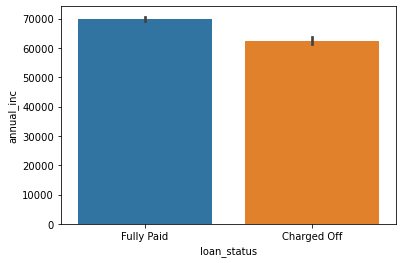

In [174]:
# Ignoring Current Customers for further Analysis as they give us no meaning full insights.
sns.barplot(data=loan[loan.loan_status!='Current'], x= 'loan_status', y='annual_inc')
plt.show()

#### From this we see that the people who are Charged Off have less overall annual income. 

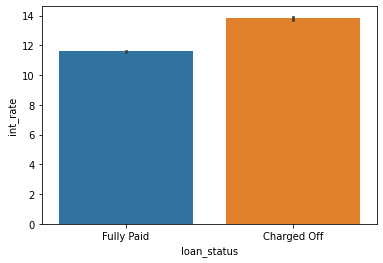

In [175]:
sns.barplot(data=loan[loan.loan_status!='Current'], x= 'loan_status', y='int_rate')
plt.show()

#### The interest rate of Charged Off customers is more than that off Fully paid. Therefore it can be said that high interest rate loans are more likely to default.

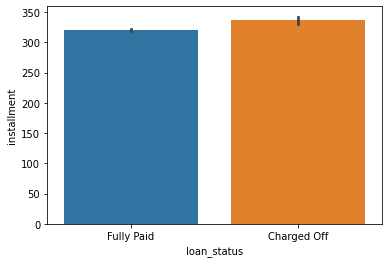

In [176]:
sns.barplot(data=loan[loan.loan_status!='Current'], x= 'loan_status', y='installment')
plt.show()

#### A similar kind of Analysis as above can be inferred

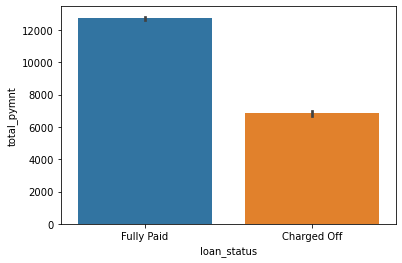

In [177]:
sns.barplot(data=loan[loan.loan_status!='Current'], x= 'loan_status', y='total_pymnt')
plt.show()

#### Default loans receive less amount of money in terms of loan repayments, nearly half than that of fully paid

### Bivariate analysis on continous variables

In [178]:
# Dropping member_id and id columns for plotting a correlation matrix so that it is simple and easy to understand
loan3 = loan1.drop(columns=['id','member_id'])

In [179]:
loan3.corr()

,loan_amnt,term,int_rate,installment,annual_inc,delinq_2yrs,total_rec_late_fee,total_pymnt,last_pymnt_amnt,issue_d_month
loan_amnt,1.000000,0.374624,0.309507,0.918214,0.315718,-0.040833,0.054392,0.656817,0.552708,0.048815
term,0.374624,1.000000,0.447833,0.098396,0.060647,-0.015131,-0.050060,0.255863,0.021251,0.057626
int_rate,0.309507,0.447833,1.000000,0.281476,0.100461,0.119633,0.027247,0.223431,0.153211,0.067301
installment,0.918214,0.098396,0.281476,1.000000,0.323135,-0.020694,0.093413,0.632486,0.618982,0.029544
annual_inc,0.315718,0.060647,0.100461,0.323135,1.000000,0.018523,0.047129,0.244436,0.210856,0.000740
delinq_2yrs,-0.040833,-0.015131,0.119633,-0.020694,0.018523,1.000000,0.031328,-0.017900,-0.002434,-0.017620
total_rec_late_fee,0.054392,-0.050060,0.027247,0.093413,0.047129,0.031328,1.000000,0.128799,0.184867,-0.022816
total_pymnt,0.656817,0.255863,0.223431,0.632486,0.244436,-0.017900,0.128799,1.000000,0.355609,0.034667
last_pymnt_amnt,0.552708,0.021251,0.153211,0.618982,0.210856,-0.002434,0.184867,0.355609,1.000000,0.043237
issue_d_month,0.048815,0.057626,0.067301,0.029544,0.000740,-0.017620,-0.022816,0.034667,0.043237,1.000000


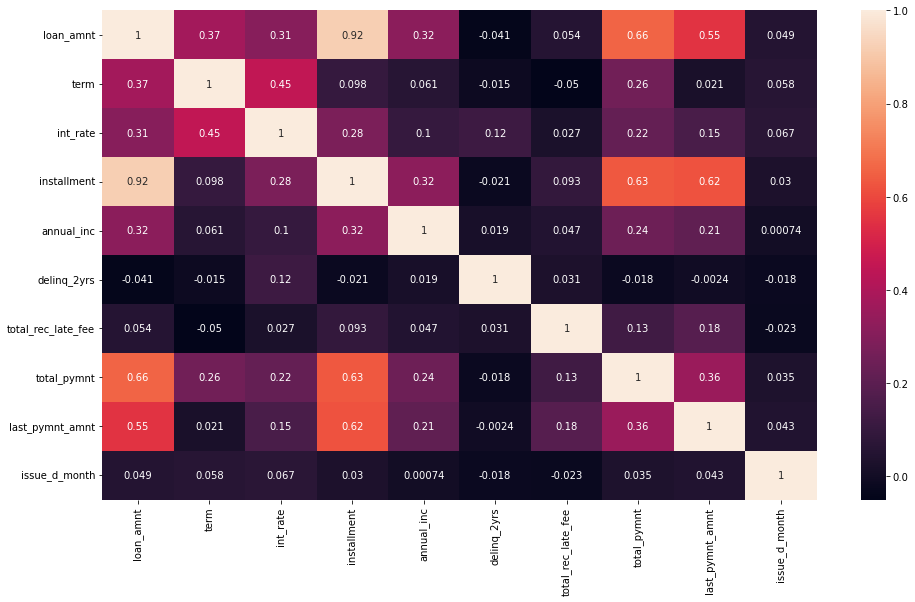

In [180]:
plt.figure(figsize=(16,9))
sns.heatmap(loan3.corr(), annot = True)
plt.show()

#### There is a high correlation between installment and loan_amnt, plotting the graph for same we get

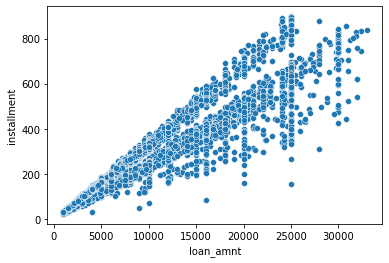

In [181]:
# Bivariate Analysis
sns.scatterplot(loan3.loan_amnt, loan3.installment)
plt.show()

#### We see that as loan_amnt increases, the monthly installment also increases, and people often tend to take hefty loans and fail to pay their monthly installment and default on loan.

### Conclusions

*  loan is usually borrowed in 5k intervals by more number of people, spikes at 5k intervals say so.
*  people whose term is 36 months are more likely to default than those who have term as 60 months
*  People who are in mortgage agreement or in Rent are more likely to default than People who have Own Houses with Maximum number of defaults coming from people who live in Rented homes.
*  not verified people are more likely to default than verified and verified ones are more likely to default than ones whose source of income is verified
*  Grades B,C and D account for most number of defualts.
*  Mortgage-Verified and Rent-Not Verified are the most defaulting categories, though Mortage-Verified is a peculiar category, indicating that it might be possible that verification is not done properly for Mortgage customers.
*  People who are staying in rented homes and have grades B, C and D are more likely to default. Same applies for people staying in mortgage homes.
*  The people who are Charged Off have least overall annual income.
*  The interest rate of Charged Off customers is more than that off Fully paid(ignoring the Current Segment). Therefore it can be said that high interest rate loans are more likely to default. The same trend can be seen for monthly installment as well.
*  We see that as loan_amnt increases, the monthly installment also increases, and people often tend to take hefty loans and fail to pay their monthly installment and default on loan.

### Variables affecting loan default

1. term
2. home ownership
3. verification status
4. grades assigned to loan
5. annual income
6. interest rate
7. Combination of home ownership and verification status